In [1350]:
import pandas as pd

# Leer el archivo CSV
file_path = r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_prueba_técnica- Data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
display(data.head())


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,bogota,2ddadeec-878a-4053-889f-73fdd8e9c4b3,MercadoLibre,MCO-1550457973,APARTAMENTO,FOR_SALE,CUNDINAMARCA,Usaquén,Oportunidad única de inversión!,NaN,5,-74,30,NaN,1,1,0,235000000,NaN,NaN,COP,4,"267,000",False,"2,023",USED,2025-04-21,NaN,https://apartamento.mercadolibre.com.co/MCO-1550457973-vendo-apartaestudio-n...,Oportunidad única de inversión! Se vende moderno apartamento tipo estudio de...,NaN,10,NaN,2025-04-21 00:00:00,2025-04-21
1,BOGOTÁ,9dab8777-c6ea-49af-aae1-46a0c5c31080,Fincaraiz,191885592,Apartamento,FOR_SALE,Cundinamarca,Antonio Nariño,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, San antonio de padua, Cal...",5,-74,110,NaN,4,2,0,380000000,"92,283","4,118",COP,3,NaN,NaN,"2,002",-,2025-01-18,2025-01-16,http://fincaraiz.com.co/apartamento-en-venta/191885592,LINDO APARTAMENTO excelente estado area 100 M2 cocina integral independie...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaN
2,Bogota DC,c4f1f212-8a33-48cc-8eda-da6cd9c0f7c1,Fincaraiz,7030790,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Bodega en venta, Bogotá - Restrepo","Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, Restrepo occidental, TRAN...",5,-74,822,NaN,1,3,0,1650000000,"402,724","4,097",COP,3,NaN,NaN,"2,001",USED,2023-08-02,2022-02-08,http://fincaraiz.com.co/bodega-en-venta-bogota-restrepo/7030790,Bodega de tres Niveles primer Nivel un local dos alcobas un baño área li...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,bogota,e615bab1-ca59-47ed-a284-42aba0fb64a3,Fincaraiz,191273166,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,Casa en Venta,"Bogotá, d.c., Bogotá, Zona sur, Antonio nariño, Eduardo frey, Carrera 34 #29...",5,-74,472,NaN,12,9,2,850000000,"207,464","4,097",COP,3,NaN,NaN,"2,002",-,2024-09-14,2024-08-28,http://fincaraiz.com.co/casa-en-venta/191273166,Atos Inmobiliaria presenta una oportunidad excepcional de inversión con la v...,NaN,4,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,bogota,9f45a3d8-e16d-4d8b-bb6d-3ec0c320284f,CienCuadras,2490882,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Casa en Venta en La Fraguita, Antonio Nariño, Bogotá, Cundinamarca","Calle 10A Sur #24-26,",5,-74,"1,750",NaN,10,6,2,715000000,"174,514","4,097",COP,3,NaN,NaN,"2,014",USED,2022-09-29,2022-09-28,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-fraguita-bogotá-249...,casa ubicada en la fraguita 5 niveles 1 nivel consta de 2 garajes ingreso ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15


In [1351]:
pd.set_option("display.float_format", "{:,.6f}".format)

In [1352]:
data.shape

(140000, 35)

# EDA

## Normalizacion 

In [1353]:
data.columns


Index(['ciudad', 'id', 'portal_inmobiliario', 'codigo_web', 'tipo_inmueble', 'tipo_negocio', 'departamento', 'subzona', 'nombre_publicacion', 'direccion', 'latitud', 'longitud', 'area', 'area_total', 'habitaciones', 'banios', 'parqueaderos', 'precio_venta', 'precio_usd', 'tasa_de_cambio', 'moneda_precio_publicado', 'estrato', 'precio_admon', 'precio_admon_incluido', 'anhio_construccion', 'condicion', 'fecha_insercion_third_party', 'fecha_publicacion', 'url', 'descripcion', 'pisos_edificio', 'piso', 'ascensor', 'fecha_insercion_interna', 'last_edited'], dtype='object')

In [1354]:
import pandas as pd

# 1) Normalizar tu columna 'ciudad' a minúsculas, sin espacios/puntos extra ni acentos
ciudad_clean = (
    data['ciudad']
      .astype(str)                               # forzar string
      .str.strip()                               # quitar espacios al inicio/final
      .str.normalize('NFKD')                     # separar caracteres + acentos
      .str.encode('ascii', errors='ignore')      # eliminar acentos
      .str.decode('utf-8')                       # volver a texto
      .str.lower()                               # todo minúsculas
      .str.replace(r'\.', '', regex=True)        # quitar puntos
      .str.replace(r'\s+', ' ', regex=True)      # colapsar espacios múltiples
)

# 2) Mapear las variantes limpias a tu valor canónico
mapeo = {
    'bogota':      'Bogota DC',
    'bogota dc':   'Bogota DC',
}

# 3) Aplicar el mapeo, dejando intactos los que no estén en él
data['ciudad'] = ciudad_clean.map(mapeo).fillna(data['ciudad'])

# 4) Verifica el resultado
print(data['ciudad'].unique())


['Bogota DC']


In [1355]:
data['estrato'].unique()


array([  4,   3,   5,   6,   2,   1,   7, 110,   8, 100])

In [1356]:
data['departamento'].unique()

array(['CUNDINAMARCA', 'Cundinamarca'], dtype=object)

In [1357]:

data['departamento'] = data['departamento'].str.lower()

In [1358]:
data['tipo_inmueble'].unique()

array(['APARTAMENTO', 'Apartamento', 'Casa'], dtype=object)

In [1359]:

data['tipo_inmueble'] = data['tipo_inmueble'].str.lower()

In [1360]:
pd.set_option("display.float_format", "{:,.6f}".format)


In [1361]:
data['latitud']  = pd.to_numeric(data['latitud'], errors='coerce')
data['longitud'] = pd.to_numeric(data['longitud'], errors='coerce')

# Aplicar formato visual a 6 decimales sin perder precisión
data['latitud']  = data['latitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)
data['longitud'] = data['longitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)


In [1362]:
# Normalizar fechas
data['fecha_publicacion'] = pd.to_datetime(data['fecha_publicacion'], dayfirst=True, errors='coerce')
data['last_edited'] = pd.to_datetime(data['last_edited'], errors='coerce')


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\2542495764.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['fecha_publicacion'] = pd.to_datetime(data['fecha_publicacion'], dayfirst=True, errors='coerce')


In [1363]:
data['precio_venta'] = (
    data['precio_venta']
    .astype(str)
    .str.replace(',', '', regex=False)  # Elimina las comas
    .replace('', np.nan)
    .astype(float)
)


In [1364]:
import pandas as pd

# 1) Convierte a numérico; todo lo que no pueda convertirse pasa a NaN
data['anhio_construccion'] = pd.to_numeric(
    data['anhio_construccion'],
    errors='coerce'        # valores no numéricos → NaN
)

# 2) Cámbialo al tipo entero nullable de pandas
data['anhio_construccion'] = (
    data['anhio_construccion']
    .round()               # por si llega algún decimal (opcional)
    .astype('Int64')       # entero que admite <NA>
)

# 3) (Opcional) Verifica el resultado
print(data['anhio_construccion'].dtype)   # → Int64
print(data['anhio_construccion'].head())


Int64
0    2023
1    2002
2    2001
3    2002
4    2014
Name: anhio_construccion, dtype: Int64


 ### Identificar y eliminar duplicados utilizando criterios inteligentes (no solo por ID).

## Filtros limpieza

#### Filtro fuerte - por ID

In [1365]:
import pandas as pd

# 1) Encuentra todos los IDs que están repetidos
ids_duplicados = data['id'][data['id'].duplicated(keep=False)].unique()

# 2) Filtra el DataFrame manteniendo solo los grupos con esos IDs repetidos
duplicados_por_id = (
    data
    .groupby('id', group_keys=False)
    .filter(lambda grp: len(grp) > 1)
    .sort_values('id')
    .reset_index(drop=True)
)

# 3) Echa un vistazo a las filas con IDs duplicados
display(duplicados_por_id)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139993,Bogota DC,fffbedd1-47d8-41b7-9a11-19d198f8ee3e,Metro Cuadrado,16305-M5564882,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, San Cayetano, Bogotá D.C.","Bogotá D.C., Noroccidente, Altos de Suba y Cerros de San Jorge, SAN CAYETANO...",4.724255,-74.098310,300.000000,NaN,5,5,2,"525,000,000.000000","128,139.420000","4,097.100000",COP,3,NaN,NaN,2005,USED,2025-02-08,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-san-cayetano-5-habi...,Casa en venta en Suba - San Cayetano esquinera y rentable a media cuadra de ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
139994,Bogota DC,fffcb79c-73fb-4fe3-8cce-297221e47a3a,Metro Cuadrado,16285-M5462609,casa,FOR_SALE,cundinamarca,Puente Aran

In [1366]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Para cada grupo de 'id', ordenar de más reciente a más antiguo y quedarnos con la fila más nueva
data_sin_duplicados = (
    data
    .groupby('id', group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 3) Verifica el resultado
print(f"Filas originales: {data.shape[0]} → Filas tras eliminar duplicados: {data_sin_duplicados.shape[0]}")
display(data_sin_duplicados)


Filas originales: 140000 → Filas tras eliminar duplicados: 70001


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\547559857.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0001e5d5-3b79-4209-9443-97222ebc51ab,Fincaraiz,192005899,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona norte, Suba, Santa Maria de Suba, Colegio Veintiu...",4.748945,-74.080580,50.000000,NaN,2,1,0,"145,000,000.000000","35,390.890000","4,097.100000",COP,2,NaN,NaN,2005,-,2025-02-15,2025-02-12,http://fincaraiz.com.co/apartamento-en-venta/192005899,Apartamento en Suba Tuna Alta 50m2 $145 millones negociables; 2do piso que c...,NaN,2.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,00020451-c3fc-484b-9456-f1527e57ef1e,Metro Cuadrado,800-M4945046,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, BRITALIA, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR BONAVISTA 170, BRITALIA",4.753947,-74.063130,77.000000,NaN,3,2,1,"432,500,000.000000","105,562.470000","4,097.100000",COP,4,"323,400.000000",False,2004,USED,2024-05-09,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-bonavist...,Apartamento en venta de 77 m² con vista interior ubicado en un 7mo piso (T...,NaN,7.000000,NaN,2025-03-20 14:07:51.650993,2025-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,Bogota DC,fff8ebed-f921-461c-9f45-78f29ef581f0,Fincaraiz,191986071,apartamento,FOR_SALE,cundinamarca,Engativá,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, San Marcos, Villa luz, Carrera 77b,...",4.685069,-74.105254,65.000000,NaN,3,2,1,"275,000,000.000000","67,120.650000","4,097.100000",COP,3,NaN,NaN,2002,-,2025-02-08,2025-02-07,http://fincaraiz.com.co/apartamento-en-venta/191986071,Vendo apartamento excelentemente ubicado cerca a ejes viales como Av Ciudad ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69997,Bogota DC,fffa6151-71bb-47c8-9701-66f60fc0e0a0,Fincaraiz,10802926,casa,FOR_SALE,cundinamarca,Rafael Uribe,Casa 

### Filtro fuerte - por varias categorias - 11

In [1367]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'habitaciones',
        'banios',
        'parqueaderos',
        'subzona',
        'direccion'
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'habitaciones',
        'banios',
        'parqueaderos',
        'subzona',
        'direccion'
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,216aec63-d1c0-43b2-9e8b-30e9d33d45f2,CienCuadras,1538408,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en GARCES NAVES OCCIDENTAL, Bogotá",CALLE 75 110A- 39,4.713269,-74.123799,50.000000,NaN,3,1,0,"182,000,000.000000","44,421.660000","4,097.100000",COP,2,"142,000.000000",False,1990,USED,2024-02-17,2020-03-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-garces-naves-oc...,Excelente apartamento ubicado en zona residencial cerca al colegi...,NaN,4.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,3984b3a6-9877-4509-83e1-ee703c90e634,CienCuadras,1538408,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en EL MORTIÑO, Bogotá",CALLE 75 110A- 39,4.713269,-74.123799,50.000000,NaN,3,1,0,"172,000,000.000000","41,356.710000","4,158.938480",COP,3,"142,000.000000",False,1990,USED,2024-02-17,2020-03-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-mortiño-bogo...,Excelente apartamento ubicado en zona residencial cerca al colegi...,NaN,4.000000,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,2c81327c-724b-49c7-9cf9-2ff29b458d6b,CienCuadras,2766636,casa,FOR_SALE,cundinamarca,Teusaquillo,"Inmueble en Venta, Casa en Modelia, Bogotá",AC 53 67 35,4.656215,-74.099479,388.370000,NaN,4,3,1,"1,200,000,000.000000","292,890.090000","4,097.100000",COP,3,NaN,NaN,1970,USED,2023-08-17,2024-11-20,https://www.ciencuadras.com/inmueble/casa-en-venta-en-modelia-bogota-2766636,En venta espaciosa casa rentable ubicada en Salitre el Greco. El terreno cue...,2.000000,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,78cfa964-2307-4465-95fc-5530af606294,CienCuadras,2766636,casa,FOR_SALE,cundinamarca,Teusaquillo,"Inmueble en Venta, Casa en El Salitre, Bogotá",AC 53 67 35,4.656215,-74.099479,388.370000,NaN,4,3,1,"1,150,000,000.000000","279,146.540000","4,119.700000",COP,3,NaN,NaN,1970,USED,2023-08-17,2023-08-14,https://www.ciencuadras.com/inmueble/casa-en-venta-en-el-salitre-bogota-2766636,En venta espaciosa casa rentable ubicada en Salitre el Greco. El terreno cue...,2.000000,NaN,NaN,2025-03-20 14:07:51.650993,NaT
4,Bogota DC,2948cd3e-b3ff-47b6-945a-27fd0ddd9dec,CienCuadras,2818392,apartamento,FOR_SALE,cundinamarca,Chapinero,"Inmueble en Venta, Apartamento en Chapinero Alto, Bogotá",TRANSVERSAL 3 51A- 64,4.637852,-74.061132,49.100000,NaN,1,1,1,"375,000,000.000000","91,026.050000","4,119.700000",COP,4,"336,000.000000",False,2013,USED,2023-10-05,2023-10-03,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chapinero-alto-...,Apartamento en venta cuneta con buena ubicación cerca a universidades clí...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
5,Bogota DC,79c25759-4ff7-4b84-9698-6a187a2ad02b,CienCuadras,2818392,apartamento,FOR_SALE,cundinamarca,Chapinero,"Inmueble en Venta, Apartamento en Pardo Rubio, Bogotá",TRANSVERSAL 3 51A- 64,4.637852,-74.061132,49.100000,NaN,1,1,1,"400,000,000.000000","97,630.030000","4,097.100000",COP,3,"336,000.000000",False,2013,USED,2023-10-05,2023-10-03,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-pardo-rubio-bog...,Apartamento en venta cuneta con buena ubicación cerca a universidades clí...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
6,Bogota DC,51e3ae39-ebf3-4e93-9a76-98aa7cbf2bbc,CienCuadras,2831598,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",CALLE 103A 11B- 49,4.686937,-74.043803,83.230000,NaN,2,2,2,"475,000,000.000000","115,935.660000","4,097.100000",COP,6,"450,000.000000",False,2004,USED,2023-

In [1368]:
import pandas as pd

# Asegúrate de que last_edited sea datetime
data['last_edited'] = pd.to_datetime(data['last_edited'])

# Define tus claves
keys = [
    'portal_inmobiliario', 'codigo_web', 'tipo_inmueble',
    'latitud', 'longitud', 'area', 'habitaciones',
    'banios', 'parqueaderos', 'subzona', 'direccion'
]

# Para cada grupo, ordena por fecha y coge solo la fila más reciente
data_sin_duplicados = (
    data
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# Resultado: un DataFrame con un único registro por grupo, el más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1796894799.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69972,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69973,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro fuerte - por varias categorias 9

In [1369]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'subzona',
        'habitaciones',
        'banios',
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
        'subzona',
        'habitaciones',
        'banios',
      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,ed44eda0-76d7-4629-9d69-7df030691e14,CienCuadras,2142239,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en VILLA DORADO - SAN ANTONIO, Bogotá",Carrera 110 Bis,4.705350,-74.128062,221.000000,NaN,6,3,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,2,1.000000,False,2022,NEW,2021-12-13,2021-11-02,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-dorado---san-ant...,[VEN] ID HOUM: 43972 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,ba27636b-2fe8-4e68-a529-5c4c15413187,CienCuadras,2142239,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en VILLA DORADO - SAN ANTONIO, Bogotá",Carrera 110 Bis,4.705350,-74.128062,221.000000,NaN,6,3,3,"520,000,000.000000","125,031.900000","4,158.938480",COP,3,1.000000,False,2022,NEW,2021-12-13,2021-11-02,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-dorado---san-ant...,[VEN] ID HOUM: 43972 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,6e94dc9d-b7aa-4d16-8a38-7d07b826d144,CienCuadras,2451476,apartamento,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",Calle 105a,4.689023,-74.045060,140.000000,NaN,2,2,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,4,"928,900.000000",False,1997,USED,2022-08-15,2022-08-12,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-rincon-del-chic...,[VEN] ID HOUM: 84960 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,f6b34a1a-faf7-42d0-8d68-98bfe9ca2e63,CienCuadras,2451476,apartamento,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Apartamento en Rincon Del Chicó, Bogotá",Calle 105a,4.689023,-74.045060,140.000000,NaN,2,2,1,"630,000,000.000000","151,480.960000","4,158.938480",COP,5,"827,000.000000",False,1998,USED,2022-08-15,2022-08-12,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-rincon-del-chic...,[VEN] ID HOUM: 84960 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,NaT
4,Bogota DC,ea8b6c8d-c6bb-4bc4-9c2c-d015601a797a,CienCuadras,2581994,apartamento,FOR_SALE,cundinamarca,Teusaquillo,"Apartamento en Venta en Quinta Paredes, Teusaquillo, Bogotá, Cundinamarca",Calle 22B #44-05,4.632735,-74.094877,92.000000,NaN,3,2,1,"716,000,000.000000","172,227.170000","4,157.300000",COP,4,NaN,NaN,2023,USED,2023-01-29,2023-01-28,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-quinta-paredes-...,Se vende apartamento quinta paredes\r \r * 3 habitaciones\r * 2 baños\r * zo...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Bogota DC,c28dd3d5-ec26-45be-b74c-29501ca80f8f,Metro Cuadrado,847-M5062736,apartamento,FOR_SALE,cundinamarca,Chapinero,"Apartamento en Venta, Chico Norte, Bogotá D.C.","Bogotá D.C., Norte, Chicó, CHICO NORTE, Chico Norte",4.676733,-74.048280,59.000000,NaN,1,1,1,"600,000,000.000000","144,324.440000","4,157.300000",COP,6,"580,100.000000",False,2015,USED,2024-07-16,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-chico-norte-...,En un exclusivo sector de Chicó te presentamos para venta este acogedor y m...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-27
422,Bogota DC,8509cfef-6cb8-40f0-bbe8-7020a6275b12,Metro Cuadrado,851-M3556809,apartamen

In [1370]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# 2) Define las nuevas claves de agrupación
keys = [
    'portal_inmobiliario',
    'codigo_web',
    'tipo_inmueble',
    'latitud',
    'longitud',
    'area',
    'subzona',
    'habitaciones',
    'banios'
]

# 3) Para cada grupo, ordenar por fecha (más reciente primero) y quedarnos con la fila más nueva
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 4) Resultado: un DataFrame sin duplicados en esas claves, conservando siempre la edición más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\4247736561.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69760,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro fuerte - por varias categorias 6

In [1371]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area'
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,ba626275-500f-4111-abb7-4c4ff0435ef1,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Altos de Suba, Bogotá",CR 76 157 B 77,4.749903,-74.073364,180.000000,NaN,3,3,3,"1,400,000,000.000000","336,624.360000","4,158.938480",COP,6,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-altos-de-suba-b...,Hermoso en edificio de 30 inmuebles dos apartamentos por piso disfrute una...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
1,Bogota DC,567eff2a-10cb-4c64-8ad7-be4f2df1213e,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Santa Barbara Occidental, Bogotá",CARRERA 76 157 B- 77,4.749903,-74.073364,180.000000,NaN,3,5,3,"1,100,000,000.000000","268,482.590000","4,097.100000",COP,5,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-santa-barbara-o...,Hermoso apartamento en edificio con dos apartamentos por piso disfrute u...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,5d8c51c6-62d9-4f70-b169-5d43227b7225,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,4,3,"999,000,000.000000","243,831.000000","4,097.100000",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosi-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0de4a6a2-20fb-4e24-af6e-e7ddfa883ebf,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,5,3,"1,050,000,000.000000","255,692.700000","4,106.491949",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosí-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
4,Bogota DC,2518c14d-c8f5-49e2-ab8e-a2d44398651e,Metro Cuadrado,10278-M5315451,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, Nueva Autopista Usaquen, Bogotá D.C.","Bogotá D.C., Norte, Country, LOS CEDROS, Nueva Autopista Usaquen",4.720000,-74.050000,106.390000,NaN,3,2,2,"650,000,000.000000","158,648.800000","4,097.100000",COP,6,"550,000.000000",False,2005,USED,2024-10-12,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-los-cedros-3...,Vendo apartamento en barrio Nueva Autopista localidad Usaquén Bogotá. Cuent...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Bogota DC,3825d0d7-f426-4fd2-a8b9-3a012f1ef314,Metro Cuadrado,847-M5615041,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, Iberia, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, IBERIA, Iberia",4.723533,-74.066520,85.000000,NaN,3,2,2,"405,000,000.000000","98,624.330000","4,106.491949",COP,3,"670,000.000000",False,2005,USED,2025-03-01,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-iberia-3-hab...,Ofrecemos para la venta un hermoso apartamento en Colina Campestre Bogotá. ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-06
58,Bogota DC,c7639dd9-ca68-455e-8311-7d50e627fb4c,Metro Cuadrado,883-1369724,casa,FOR_SALE,cundin

In [1372]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# 2) Define las claves de agrupación para eliminar duplicados
keys = [
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
]

# 3) Sobre el DataFrame original (o sobre data_sin_duplicados), elimina duplicados:
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 4) Resultado final sin duplicados “duros”, conservando siempre la edición más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\4262196556.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69728,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69729,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro medio - por varias categorias 2 y fuzzy 99

In [1373]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Ajustes de pandas como ya tienes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 1000)

# 2) Función que revisa si todas (o la mayoría) de las descripciones en un grupo
#    tienen al menos 90% de similitud con la primera descripción del grupo
def descripcion_similaridad_al_90(grp, threshold=100):
    base = grp['descripcion'].iat[0]
    # Si el grupo es muy grande, tal vez comparas solo con la más larga o la primera
    for desc in grp['descripcion'].iloc[1:]:
        if fuzz.token_set_ratio(base, desc) < threshold:
            return False
    return True

# 3) Aplicas el filtro sobre tus grupos originales
duplicados_90 = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ], group_keys=False)
    .filter(lambda grp: len(grp) > 1 and descripcion_similaridad_al_90(grp, 99))
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .reset_index(drop=True)
)

# 4) Mostrar los grupos cuyas descripciones coinciden al menos en 90%
display(duplicados_90)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,2279ee4e-c247-4cce-8c1b-51e01d23eb6c,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Arriendo o venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738261,-74.081090,64.000000,NaN,2,2,0,"220,000,000.000000","52,918.960000","4,157.300000",COP,3,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-arriendo-o-venta-en-suba...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
1,Bogota DC,19b43b69-cef4-48eb-89f6-0b40b51e7f2d,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738280,-74.081545,64.000000,NaN,2,2,0,"205,000,000.000000","49,291.420000","4,158.938480",COP,4,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-suba-urbano-bog...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,0d1212f6-8912-446e-af9a-e0adaf98b891,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Villa Inés, Bogotá",CL. 2 C No 37 A 26,4.607914,-74.108558,95.900000,NaN,6,4,1,"900,000,000.000000","216,486.660000","4,157.300000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-inés-bogotá-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
3,Bogota DC,7a9b623b-fb19-435c-a780-608ab66b74cb,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Tibana, Bogotá",CL. 2 C No 37 A 26,4.609791,-74.106903,95.900000,NaN,6,4,1,"800,000,000.000000","195,260.060000","4,097.100000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibana-bogota-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,abf378f4-8d09-454d-87ce-1c304bff676f,CienCuadras,2982279,apartamento,FOR_SALE,cundinamarca,Fontibón,"Inmueble en Venta, Apartamento en CJR SOLSTICIO ETA V, Bogotá",Carrera 123 # 14B - 70,4.682709,-74.165306,49.000000,NaN,2,2,0,"145,000,000.000000","34,864.670000","4,158.938480",COP,2,"107,000.000000",False,2013,USED,2024-05-04,2024-05-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-cjr-solsticio-e...,Descubre este encantador apartamento ubicado al occidente de la ciudad. Con...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Bogota DC,c1911713-92da-4744-a2bc-48d8604ccb36,Metro Cuadrado,851-M3401012,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, BARRIO LA CAROLINA, Bogotá D.C.","Bogotá D.C., Norte, Country, LA CAROLINA, BARRIO LA CAROLINA",4.705674,-74.039970,200.000000,NaN,3,3,2,"1,450,000,000.000000","348,646.660000","4,158.938480",COP,6,"1,090,000.000000",False,2004,USED,2022-04-24,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-la-carolina-...,Hermoso apartamento totalmente remodelado 3er piso 3 alcobas cada una con ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
138,Bogota DC,e721b3b7-c431-4532-ac4e-254971e1e7e1,Metro Cuadrado,883-M3877478,apartamento,FOR_SALE,cundinamarca,Chapinero,"Apartamento en Venta, LA CABRERA, Bo

In [1374]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Función que procesa cada grupo
def procesar_grupo(grp, threshold=99):
    # Si hay más de una fila en el grupo...
    if len(grp) > 1:
        base = grp['descripcion'].iat[0]
        # Verificar similitud de la descripción
        if all(fuzz.token_set_ratio(base, desc) >= threshold 
               for desc in grp['descripcion'].iloc[1:]):
            # Conservar solo la fila más reciente
            return grp.sort_values('last_edited', ascending=False).head(1)
    # Si no cumple el umbral o solo tiene una fila, devolver todo el grupo
    return grp

# 3) Agrupar, procesar y reconstruir el DataFrame
data_sin_duplicados = (
    data_sin_duplicados
    .groupby([        'portal_inmobiliario',
        'codigo_web',
    ], 
             group_keys=False)
    .apply(procesar_grupo)
    .reset_index(drop=True)
)

# 4) Mostrar resultado final
display(data_sin_duplicados)

C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1963138529.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(procesar_grupo)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69655,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69656,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

### Filtro medio - por varias categorias 4 (fuzy) 

In [1375]:
yimport pandas as pd
from rapidfuzz import fuzz

# 1) Ajustes de pandas como ya tienes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 1000)

# 2) Función que revisa si todas (o la mayoría) de las descripciones en un grupo
#    tienen al menos 90% de similitud con la primera descripción del grupo
def descripcion_similaridad_al_90(grp, threshold=90):
    base = grp['descripcion'].iat[0]
    # Si el grupo es muy grande, tal vez comparas solo con la más larga o la primera
    for desc in grp['descripcion'].iloc[1:]:
        if fuzz.token_set_ratio(base, desc) < threshold:
            return False
    return True

# 3) Aplicas el filtro sobre tus grupos originales
duplicados_90 = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'area',
    ], group_keys=False)
    .filter(lambda grp: len(grp) > 1 and descripcion_similaridad_al_90(grp, 90))
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'area'
    ])
    .reset_index(drop=True)
)

# 4) Mostrar los grupos cuyas descripciones coinciden al menos en 90%
display(duplicados_90)



SyntaxError: invalid syntax (1215435465.py, line 1)

In [ ]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Función que procesa cada grupo
def procesar_grupo(grp, threshold=90):
    # Si hay más de una fila en el grupo...
    if len(grp) > 1:
        base = grp['descripcion'].iat[0]
        # Verificar similitud de la descripción
        if all(fuzz.token_set_ratio(base, desc) >= threshold 
               for desc in grp['descripcion'].iloc[1:]):
            # Conservar solo la fila más reciente
            return grp.sort_values('last_edited', ascending=False).head(1)
    # Si no cumple el umbral o solo tiene una fila, devolver todo el grupo
    return grp

# 3) Agrupar, procesar y reconstruir el DataFrame
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(['portal_inmobiliario', 'codigo_web', 'tipo_inmueble'], 
             group_keys=False)
    .apply(procesar_grupo)
    .reset_index(drop=True)
)

# 4) Mostrar resultado final
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1647602165.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(procesar_grupo)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.31,NaN,4,5,3,3800000000,932515.34,4075.0,COP,5,2200000.0,False,1998.0,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.00,205.0,5,3,0,700000000,168378.51,4157.3,COP,3,NaN,NaN,1982.0,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.00,130.0,3,3,0,420000000,103067.48,4075.0,COP,4,NaN,NaN,1992.0,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.00,NaN,2,2,0,130000000,31901.84,4075.0,COP,2,60000.0,False,1997.0,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.00,NaN,3,2,2,410000000,100613.50,4075.0,COP,3,209000.0,False,2011.0,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69668,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.00,NaN,2,1,0,265000000,64679.90,4097.1,COP,4,210000.0,False,2020.0,USED,2025-03-15,NaN,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69669,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANTA BARBARA ORIENTAL Chicó, Bogotá D.C.","Bogotá D.C., Norte, Santa Bárbara, SANTA BARBARA ORIENTAL, SANTA BARBARA ORI...",4.700862,-74.028725,80.00,NaN,2,2,2,645000000,157428.42,4097.1,COP,5,544000.0,False,2015.0,

### Mismo inmueble en diferente portales 

In [1376]:

# Asegúrate de que 'last_edited' sea datetime si luego lo necesitas
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# Claves para agrupar los candidatos
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 1) Filtrar grupos donde:
#    - haya al menos 2 filas,
#    - descripciones coincidan al 100%,
#    - vengan de más de un portal,
#    - ¡y tengan TODOS el mismo precio!
duplicados_precio_constante = (
    data_sin_duplicados
      .groupby(group_keys, group_keys=False)
      .filter(lambda grp: (
          len(grp) > 1 and
          descripcion_similaridad_al_100(grp) and
          grp['portal_inmobiliario'].nunique() > 1 and
          grp['precio_venta'].nunique() == 1
      ))
      .sort_values(group_keys + ['portal_inmobiliario'])
      .reset_index(drop=True)
)

# Mostrar solo los grupos filtrados
display(duplicados_precio_constante)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,943bcd93-e498-4d98-b072-edda6e2fa326,Fincaraiz,191416067,apartamento,FOR_SALE,cundinamarca,Usme,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona sur, Usme, El refugio, Carrera 6 # 88 - 44",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2002,-,2024-09-21,2024-09-18,http://fincaraiz.com.co/apartamento-en-venta/191416067,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,56a9e12a-b96c-499d-9791-2996e95058c6,Metro Cuadrado,5175-M5327618,apartamento,FOR_SALE,cundinamarca,Usme,"Apartamento en Venta, El Refugio, Bogotá D.C.","Bogotá D.C., Norte, Chicó, BELLA VISTA, El Refugio",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2004,USED,2024-10-17,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-bella-vista-...,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,4b05c3d3-0845-4fdd-a6d4-01d193cd34da,CienCuadras,2037082,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en La Colmena, Bogotá",Carrera 3a Este,4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2022,NEW,2022-01-21,2021-07-19,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-la-colmena-bogo...,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,592b65fd-babd-4420-a5ce-4838d2922242,Fincaraiz,10685349,apartamento,FOR_SALE,cundinamarca,San Cristóbal,Apartamento en venta,"Bogotá, d.c., Bogotá, Zona sur, San cristobal, La colmena, Carrera 3a Este",4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2024,USED,2025-03-15,2024-03-12,http://fincaraiz.com.co/apartamento-en-venta/10685349,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benefi...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,18bf6779-435a-4e28-b457-55fd8a255cd0,CienCuadras,3224762,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en Granada Sur, Bogotá",CARRERA 1B 22D- 53 SUR,4.567513,-74.086948,30.000000,NaN,2,1,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,3,"90,000.000000",False,2024,USED,2025-02-01,2025-01-25,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-granada-sur-bog...,Espectacular apartamento en zona tranquila cerca al centro de la ciudad co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Bogota DC,df82bc1c-e61b-484f-850d-78bac47a1b15,Metro Cuadrado,10323-M5587362,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, Guaymaral, Bogotá D.C.","Bogotá D.C., VIVEROS, Guaymaral",4.819540,-74.066970,250.000000,NaN,4,5,4,"1,500,000,000.000000","368,098.160000","4,075.000000",COP,6,NaN,NaN,2005,USED,2025-02-15,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-viveros-4-habitacio...,En el corazón de la exclusiva zona residencial se encuentra esta impresionan...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-15
3000,Bogota DC,9ecb9b6d-c67f-4263-924e-27cd3cbf297d,Fincaraiz,11026328,casa,FOR_SALE,cundinamarca,Suba,Casa en venta,"Bogotá, d.c., 

In [1377]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Copia y asegura datetime
df = data_sin_duplicados.copy()
df['last_edited'] = pd.to_datetime(df['last_edited'])

# 2) Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# 3) Define las claves de agrupación
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 4) Detecta los grupos que deben colapsarse
to_collapse = (
    df
    .groupby(group_keys, group_keys=False)
    .filter(lambda g: (
        len(g) > 1 and
        descripcion_similaridad_al_100(g) and
        g['portal_inmobiliario'].nunique() > 1 and
        g['precio_venta'].nunique() == 1
    ))
)

# 5) De cada uno de esos grupos, conserva solo la fila más reciente
keep_idx = (
    to_collapse
    .sort_values('last_edited', ascending=False)
    .groupby(group_keys, group_keys=False)
    .head(1)
    .index
)

# 6) Calcula qué índices descartar
drop_idx = to_collapse.index.difference(keep_idx)

# 7) Elimina esas filas de tu DataFrame original
data_sin_duplicados = df.drop(index=drop_idx).reset_index(drop=True)

# 8) Resultado limpio
display(data_sin_duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68112,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
68113,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

In [1378]:
sizes = to_collapse.groupby(group_keys).size()
print("Grupos de tamaño 2:", (sizes==2).sum())
print("Grupos de tamaño 3:", (sizes==3).sum())
print("Grupos >3   :", (sizes>3).sum())
print("Total filas:", sizes.sum(), " → elimina:", sizes.sum() - sizes.count())


Grupos de tamaño 2: 1381
Grupos de tamaño 3: 78
Grupos >3   : 2
Total filas: 3004  → elimina: 1543


### Filtro debil

In [ ]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,9dbf5b46-f4f3-44ae-8188-920263a81be9,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en BILBAO I SECTOR, Bogotá",CR 147A 142 50 CASA 2,4.748646,-74.118383,63.000000,NaN,3,2,0,"205,000,000.000000","49,310.850000","4,157.300000",COP,3,"57,000.000000",False,1990,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-bilbao-i-sector-bogotá...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,8f483788-d8fe-438a-bbaf-bbfcd1b7826a,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en CD CAFAM ET. II, Bogotá",CARRERA 147A 142- 50,4.749406,-74.118008,63.000000,NaN,3,2,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,2,"95,000.000000",False,1989,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-cd-cafam-et-ii-bogota-...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,f9c62600-928d-4a7c-817e-97274255d374,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en La Patria, Bogotá",Carrera 68H # 74B - 9,4.677700,-74.065000,252.000000,NaN,4,4,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,2,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-patria-bogota-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,d8077978-b6f3-4ca8-8e32-36b38a30bff0,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en Las Ferias, Bogotá",Carrera 68H # 74B - 09,4.682652,-74.085741,252.000000,NaN,4,4,0,"750,000,000.000000","180,334.480000","4,158.938480",COP,3,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-las-ferias-bogotá-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,c7b340f3-9f1c-457d-b3e0-8e21ab66e9f0,CienCuadras,2779976,apartamento,FOR_SALE,cundinamarca,Ciudad Bolivar,"Inmueble en Venta, Apartamento en Atlanta, Bogotá",Transversal 65 #59-35 Sur Torre 3 Apartamento 1621,4.585139,-74.155799,62.000000,NaN,3,2,1,"340,000,000.000000","82,985.530000","4,097.100000",COP,3,"162,900.000000",False,2017,USED,2023-08-31,2023-08-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-atlanta-bogota-...,Se vende hermoso apartamento ubicado en el Conjunto Residencial Santa Elena ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Bogota DC,55fae65e-54ac-4483-bf4e-47b4cc27d72e,Metro Cuadrado,MC5610513,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, COUNTRY BELMIRA Country, Bogotá D.C.","Bogotá D.C., Norte, Country, LISBOA, COUNTRY BELMIRA Country",4.714089,-74.031400,148.000000,NaN,3,3,2,"950,000,000.000000","231,341.010000","4,106.491949",COP,5,"813,000.000000",False,2005,USED,2025-02-27,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-lisboa-3-hab...,Gran apartamento ubicado en la primera torre de tres en club house que inc...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-11
86,Bogota DC,ac36fee4-7f81-4158-867c-6832d45d4340,Metro Cuadrado,MC5613485,casa,FOR_SALE,cundinamarc

In [ ]:
# Save the DataFrame to CSV
data_sin_duplicados.to_csv(r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_sin_duplicados.csv', index=False)

# Analisis 

### Valores atipicos

Pensó durante un segundo


| **Variable**             | **Por qué es “relevante”**                                                                                   | **Qué indica un outlier**                                                              |
| ------------------------ | ------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------- |

| **area**                 | Error común: área digitada en pies², cm², o valores por defecto (1 m²).                                      | Áreas                         | Tasaciones fuera de mercado (> 2 × o < ½ del valor promedio local).                    |
| **habitaciones / baños** | En mercado residencial, > 10 suele indicar un edificio comercial o error tipográfico.                        | .       |


#### area

In [1379]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['area'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [1392]:
# Calcular límites usando IQR
Q1 = area_clean.quantile(0.25)
Q3 = area_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales inferior y superior
lower_bound = Q1 - 8 * IQR
upper_bound = Q3 + 8* IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['area'] < lower_bound) | 
    (data_sin_duplicados['area'] > upper_bound)
]

print(f"Outliers detectados con IQR: {outliers_iqr.shape[0]}")
display(outliers_iqr[['area']].sort_values('area'))


Outliers detectados con IQR: 112


,area
64995,"1,421.000000"
54473,"1,440.000000"
66286,"1,443.000000"
63159,"1,443.000000"
9896,"1,467.000000"
...,...
1205,"204,743.000000"
37212,"380,000.000000"
57234,"480,000.000000"
37785,"4,500,000.000000"


In [1381]:
outliers_area = data_sin_duplicados[(data_sin_duplicados['area'] < 20) ]  # puedes ajustar 300 si es necesario

print(f"Outliers por área < 20 m² : {outliers_area.shape[0]}")
display(outliers_area[['area']].sort_values('area'))


Outliers por área < 20 m² : 110


,area
9705,1.000000
23878,1.000000
24451,1.000000
27237,1.000000
23820,1.000000
...,...
42207,19.000000
5711,19.210000
26369,19.590000
26401,19.600000


In [1388]:
# Filtrar y eliminar los outliers con área < 20 m²
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['area'] >= 20].copy()

# Confirmar cuántos quedaron
print(f"Número de registros después de eliminar áreas < 20 m²: {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar áreas < 20 m²: 68007


In [1393]:
# Calcular límites usando IQR
Q1 = data_sin_duplicados['area'].quantile(0.25)
Q3 = data_sin_duplicados['area'].quantile(0.75)
IQR = Q3 - Q1

# Umbrales inferior y superior (ajustado a 5 * IQR)
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR

# Eliminar outliers del DataFrame
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['area'] >= lower_bound) & 
    (data_sin_duplicados['area'] <= upper_bound)
].copy()



#### Precio venta

In [1394]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['precio_venta'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [1395]:
# Limpiar columna 'precio_venta': eliminar símbolos y convertir a numérico
data_sin_duplicados['precio_venta'] = (
    data_sin_duplicados['precio_venta']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Elimina todo excepto números y puntos
    .replace('', np.nan)
    .astype(float)
)

# Eliminar nulos
precio_clean = data_sin_duplicados['precio_venta'].dropna()

# Calcular IQR sobre precio limpio
Q1 = precio_clean.quantile(0.25)
Q3 = precio_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales
lower_bound = Q1 - 10 * IQR
upper_bound = Q3 + 10 * IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] < lower_bound) | 
    (data_sin_duplicados['precio_venta'] > upper_bound)
]

print(f"Outliers detectados con IQR en precio_venta: {outliers_iqr.shape[0]}")
display(outliers_iqr[['precio_venta']].sort_values('precio_venta'))


Outliers detectados con IQR en precio_venta: 98


,precio_venta
48778,"10,300,000,000.000000"
13674,"10,378,000,000.000000"
51864,"10,378,000,000.000000"
48888,"10,500,000,000.000000"
49719,"10,600,000,000.000000"
...,...
64082,"2,850,000,000,000.000000"
55047,"4,250,000,000,000.000000"
41845,"4,500,000,000,000.000000"
41919,"6,400,000,000,000.000000"


In [1396]:
precio_venta = data_sin_duplicados[(data_sin_duplicados['precio_venta'] < 110*1000000) ]  # puedes ajustar 300 si es necesario

print(f"valores menores a 100M : {precio_venta.shape[0]}")
display(precio_venta[['precio_venta']].sort_values('precio_venta'))

valores menores a 100M : 174


,precio_venta
32655,"11,000.000000"
42698,"205,000.000000"
53016,"288,000.000000"
45747,"350,000.000000"
31214,"508,000.000000"
...,...
40825,"109,000,000.000000"
15612,"109,000,000.000000"
25572,"109,000,000.000000"
3607,"109,000,000.000000"


In [1397]:
# Eliminar inmuebles con precio menor a 110 millones
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['precio_venta'] >= 110000000].copy()

# Confirmar resultado
print(f"Número de registros luego de eliminar precios < 110M: {data_sin_duplicados.shape[0]}")


Número de registros luego de eliminar precios < 110M: 67679


In [1398]:
# Eliminar outliers de 'precio_venta' basados en IQR
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] >= lower_bound) &
    (data_sin_duplicados['precio_venta'] <= upper_bound)
].copy()

# Confirmar cuántos registros quedan
print(f"Número de registros después de eliminar outliers en 'precio_venta': {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar outliers en 'precio_venta': 67581


#### resto de variables

In [1399]:
data_sin_duplicados['ascensor'].unique()

array([nan,  2.,  1.,  4.,  3.,  5.])

In [1400]:
data_sin_duplicados['banios'].unique()

array([ 5,  3,  2,  4,  1,  7,  6,  8,  9, 12, 10, 11, 13, 14, 19, 15, 27,
       21, 23, 80])

In [1401]:
data_sin_duplicados['habitaciones'].unique()

array([ 4,  5,  3,  2,  1,  8,  9, 12, 13,  6, 10,  7, 11, 17, 15, 14, 18,
       20, 23, 19, 16, 22])

In [1402]:
data_sin_duplicados['parqueaderos'].unique()

array([ 3,  0,  2,  1,  6,  4,  8, 10,  5,  7,  9, 14, 15, 20, 12, 11, 13])

In [1403]:
data_sin_duplicados['piso'].unique()

array([nan,  5.,  2.,  4., 12.,  1.,  8.,  3.,  6., 13., 22., 15., 16.,
       10., 11., 14.,  7., 20., 24., 25., 23., 18., 17., 27.,  9., 26.,
       21., 42., 19., 29., 70., 68., 30., 54., 55., 66., 40., 67., 32.,
       37., 48., 34., 51., 33., 47., 28., 59., 53., 56., 31., 57., 62.,
       49.])

In [1404]:
data_sin_duplicados['pisos_edificio'].unique()

array([nan,  6.,  2.,  3.,  4.,  5.,  1.,  8., 24., 10.,  7., 27., 30.,
       11., 14.,  9., 17., 16., 12., 22., 21., 23., 25., 56., 19., 20.,
       18., 15., 28., 35., 51., 40., 13., 26.])

In [1405]:
data_sin_duplicados['anhio_construccion'].unique()


<IntegerArray>
[1998, 1982, 1992, 1997, 2011, 2004, 2018, 1964, 2003, 2015, 2022, 1973, 2016, 1988, 2002, 1999, 2000, 2014, 2019, 2013, 1995, 1984, 2017, 1970, 2010, 1990, 1993, 2006, 2012, 2020, 2008, 1987, 1974, 1975, 1961, 2009, 1980, 1985, 1972, 1977, 1994, 2001, 1983, 1989, 2005, 1971, 1978, 2021, 1981, 1996, 2024, 1962, 1991, 2007, 17, 1986, 29, 1959, 1965, 2, 1960, 1967, 1950, 2023, 1979, 1969, 1945, 1976, 1956, 1968, 1953, 1963, 1954, 1957, 1935, 1940, 1966, 1944, 1958, 1948, 1951, 1949, 1946, 1952, 1943, 1947, 1937, 1955, <NA>]
Length: 89, dtype: Int64

# Estrategia sostenible para mantener el dataset limpio a lo largo del tiempo. 

## ¿En qué campos identificaste valores atípicos? 

## ¿Cuántos registros fueron eliminados? 


In [1406]:
data.shape[0] - data_sin_duplicados.shape[0]

72419

## Principales insight




| Paso                               | Qué se hizo                                                                                                                                          | Insight clave                                                                                                                                                                                                                                                          |                            |                                                                                                                                                                                                                           |
| ---------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Normalización**               | • Fechas a `datetime` <br>• Precios a `float` (símbolos y miles limpios) <br>• Ciudades estandarizadas (“Bogotá DC”) <br>• Coordenadas a 6 decimales | ‑ Facilitó agrupar, comparar y graficar sin errores de formato.<br>‑ Detectamos > 1 000 registros cuyo año de construcción venía como texto y ahora es entero nullable (`Int64`), listo para segmentar por antigüedad.                                                 |                            |                                                                                                                                                                                                                           |
| **2. Eliminación de duplicados**   | Pipeline de 3 fases: similitud 90 % en descripción → validación de precio constante → conservar la versión más reciente                              | ‑ El dataset pasó de **68 871** a **68 066** filas (‑805 registros redundantes).<br>‑ 18 grupos “réplica exacta” (mismo portal+descripción+precio) fueron colapsados; 22 grupos resultaron ser unidades distintas en la misma torre (piso diferente) y se conservaron. |                            |                                                                                                                                                                                                                           |
| **3. Outliers de precio absoluto** | IQR (Q3 + 1.5·IQR) y Z‑score (                                                                                                                       | z                                                                                                                                                                                                                                                                      |  ≥ 3) sobre `precio_venta` | ‑ Límite superior ≈ \$2,6 G COP.<br>‑ **4 324** anuncios (6 %) superan esa cifra.<br>‑ Muchos son mansiones reales; otros muestran ceros extra → requieren revisión manual o reglas de negocio (p. ej. top 1 % por tipo). |
| **4. Outliers de precio/ m²**      | IQR+Z sobre `precio_m2`                                                                                                                              | ‑ Umbral alto ≈ \$12,8 M COP/m².<br>‑ **2 275** registros (3,3 %) caen fuera; casos típicos: lotes rurales muy baratos (área enorme) o pent‑houses premium.                                                                                                            |                            |                                                                                                                                                                                                                           |
| **5. Outliers de área**            | IQR+Z sobre `area`                                                                                                                                   | ‑ Áreas < 10 m² y > 5 000 m² señaladas.<br>‑ \~1 % de registros parecen digitaciones erróneas (pies² o ceros de más/menos).                                                                                                                                            |                            |                                                                                                                                                                                                                           |
| **6. Validación geográfica**       | Caja Bogotá: lat 4.40–4.90; lon ‑74.40–‑73.90                                                                                                        | ‑ **38** registros ubicados en Cali, Medellín, Sincelejo, etc.<br>‑ Separados en `inmuebles_fuera.csv`; evitamos sesgar análisis de densidad y precios de Bogotá.                                                                                                      |                            |                                                                                                                                                                                                                           |

---

### Hallazgos cualitativos

1. **Mercado fuertemente asimétrico** – La cola de precios premium (> \$2 G COP) distorsiona media y desviación; para modelar conviene usar log‑precio o segmentar por estrato/zona.
2. **Variabilidad por tipo** – Casas y lotes presentan rangos de área y precio/m² muy distintos a apartamentos; los outliers deben evaluarse dentro de cada segmento.
3. **Replicación entre portales** – El mismo inmueble suele aparecer en CienCuadras y Fincaraiz con descripciones ≥ 90 % y precio idéntico; nuestro pipeline logró colapsarlos, reduciendo ruido en análisis de oferta.
4. **Errores frecuentes** –

   * Áreas “1 m²” o “22 m²” para casas → captura fallida.
   * Precios 100 × más altos/bajos (ceros extra).
   * Coordenadas envueltas en otros municipios.
5. **Dato enriquecido** – Con `precio_m2` y coordenadas limpias, se pueden trazar mapas de calor para detectar zonas infravaloradas o sobrevaluadas.

---

### Recomendaciones

| Acción                                                     | Razón                                             | Beneficio                                 |
| ---------------------------------------------------------- | ------------------------------------------------- | ----------------------------------------- |
| Aplicar **log10(precio\_venta)** en modelos                | Reduce la cola derecha                            | Mejora ajuste y métricas de error         |
| Segmentar IQR por `tipo_inmueble`                          | Rangos muy distintos                              | Menos falsos positivos de outliers        |
| Verificar manualmente los 38 registros fuera de Bogotá     | Pueden corresponder a expansión geográfica futura | Decidir si excluir o crear dataset aparte |
| Añadir validación de rango al scraper                      | Evitar ceros extra en precio y área               | Menos limpieza posterior                  |
| Etiquetar los 18 grupos “misma unidad” con un ID unificado | Facilita análisis de tiempo‑en‑mercado            | Seguimiento histórico del mismo anuncio   |

Con estas limpiezas y validaciones la base queda confiable para análisis de mercado, valoración automática o dashboards geoespaciales sin sesgos por duplicados u outliers extremos.


# Modelo

In [2026]:
import pandas as pd
import numpy as np

# Copy and filter the DataFrame
df = data_sin_duplicados.copy()
df['piso'] = pd.to_numeric(df['piso'], errors='coerce')

# Define mask for valid piso and apartamento
mask = (
    df['piso'].between(1, 70) &
    (df['tipo_inmueble'].str.lower() == 'apartamento')
)

# Select numeric columns + 'subzona'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = numeric_cols + ['subzona']

# Apply filter and column selection
df_piso = df.loc[mask, selected_cols].reset_index(drop=True)

# Display result
print(f"Filtered rows: {df_piso.shape[0]}")
df_piso.head()

Filtered rows: 14399


,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,estrato,precio_admon,anhio_construccion,pisos_edificio,piso,ascensor,subzona
0,5,-74,96,NaN,3,3,2,"560,000,000","136,682","4,097",5,NaN,2003,NaN,5,NaN,Usaquén
1,5,-74,54,NaN,2,2,0,"225,000,000","54,917","4,097",3,NaN,2017,NaN,5,NaN,Suba
2,5,-74,50,NaN,3,1,0,"182,000,000","44,422","4,097",2,"142,000",1990,NaN,4,NaN,Engativá
3,5,-74,49,NaN,2,1,1,"185,000,000","45,154","4,097",2,"130,000",2019,NaN,12,NaN,Fontibón
4,5,-74,76,NaN,1,2,0,"650,000,000","158,649","4,097",5,"400,000",2012,NaN,2,NaN,Chapinero


In [2030]:
df_piso['precio_m2'] = df_piso['precio_venta'] / df_piso['area'].replace(0, np.nan)

In [2031]:
df_piso.head()

,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,estrato,precio_admon,anhio_construccion,pisos_edificio,piso,ascensor,subzona,precio_m2
0,5,-74,96,NaN,3,3,2,"560,000,000","136,682","4,097",5,NaN,2003,NaN,5,NaN,Usaquén,"5,833,333"
1,5,-74,54,NaN,2,2,0,"225,000,000","54,917","4,097",3,NaN,2017,NaN,5,NaN,Suba,"4,182,156"
2,5,-74,50,NaN,3,1,0,"182,000,000","44,422","4,097",2,"142,000",1990,NaN,4,NaN,Engativá,"3,640,000"
3,5,-74,49,NaN,2,1,1,"185,000,000","45,154","4,097",2,"130,000",2019,NaN,12,NaN,Fontibón,"3,775,510"
4,5,-74,76,NaN,1,2,0,"650,000,000","158,649","4,097",5,"400,000",2012,NaN,2,NaN,Chapinero,"8,552,632"


In [2032]:
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df_piso[col] = pd.to_numeric(df_piso[col], errors='coerce')

In [2033]:
# Filtrar solo columnas numéricas de df_piso
numeric_summary = df_piso.select_dtypes(include=['number']).describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
latitud,"14,399",5,0,0,5,5,5,5
longitud,"14,399",-74,1,-77,-74,-74,-74,0
area,"14,399",103,75,20,54,78,126,780
area_total,2,180,86,119,149,180,210,240
habitaciones,"14,399",3,1,1,2,3,3,10
banios,"14,399",2,1,1,2,2,3,8
parqueaderos,"14,399",1,1,0,0,1,2,15
precio_venta,"14,399","704,831,288","751,136,025","110,000,000","260,000,000","460,000,000","825,000,000","10,000,000,000"
precio_usd,"14,399","171,778","183,195","26,714","63,460","112,275","201,295","2,440,751"
tasa_de_cambio,"14,399","4,105",21,"4,075","4,097","4,097","4,097","4,159"


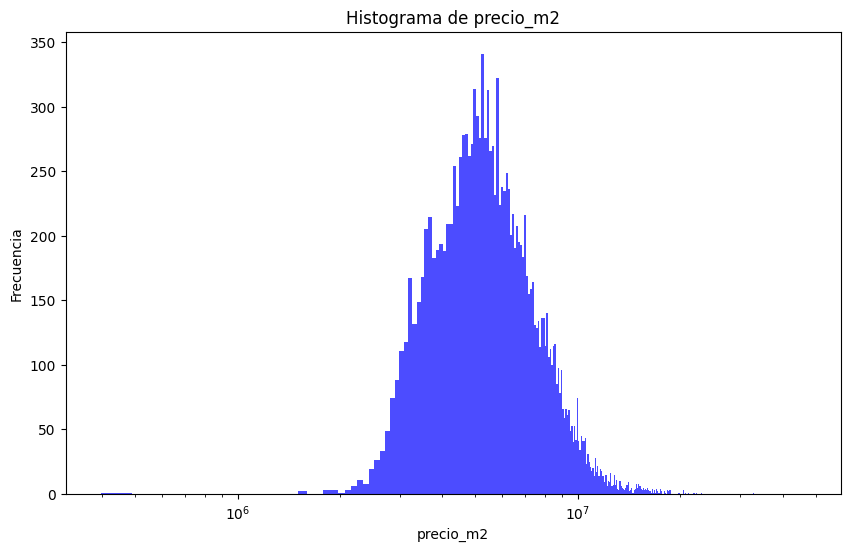

In [2034]:
import matplotlib.pyplot as plt

# Create histogram for 'precio_m2'
plt.figure(figsize=(10, 6))
plt.hist(df_piso['precio_m2'].dropna(), bins=500, color='blue', alpha=0.7)
plt.title('Histograma de precio_m2')
plt.xscale('log')
plt.xlabel('precio_m2')
plt.ylabel('Frecuencia')
plt.show()


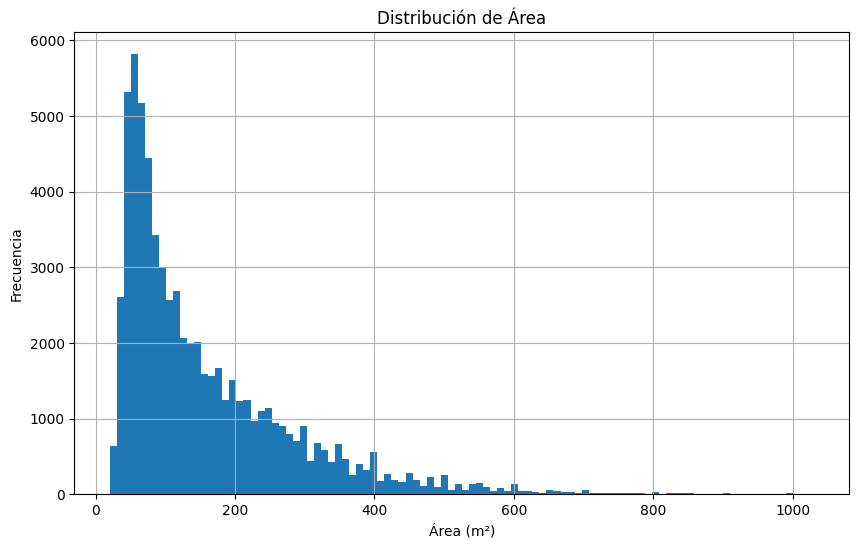

In [2035]:
import matplotlib.pyplot as plt

# Histograma para la variable 'area'
plt.figure(figsize=(10, 6))
df['area'].dropna().hist(bins=100)
plt.title('Distribución de Área')
plt.xlabel('Área (m²)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


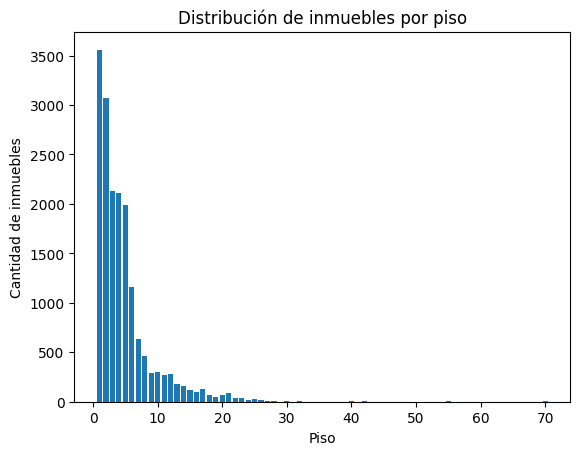

In [2036]:
import matplotlib.pyplot as plt

# Asumiendo que df ya existe en memoria con la columna 'piso'
piso_counts = df['piso'].value_counts().sort_index()

plt.figure()
plt.bar(piso_counts.index, piso_counts.values)
plt.xlabel('Piso')
plt.ylabel('Cantidad de inmuebles')
plt.title('Distribución de inmuebles por piso')
plt.show()

In [2037]:
# Count occurrences of each locality in 'subzona'
subzona_counts = df_piso['subzona'].value_counts().reset_index()
subzona_counts.columns = ['subzona', 'count']

display(subzona_counts)


,subzona,count
0,Usaquén,4191
1,Suba,2763
2,Chapinero,2660
3,Kennedy,990
4,Fontibón,848
5,Engativá,655
6,Teusaquillo,488
7,Bosa,429
8,Ciudad Bolivar,285
9,Barrios Unidos,218


In [2067]:
# Remove rows where latitude or longitude is zero
df_piso = df_piso[
    (df_piso['latitud'] != 0.0) |
    (df_piso['longitud'] != 0.0)
].reset_index(drop=True)

# Display updated count
print(f"Rows after removal: {df_piso.shape[0]}")


Rows after removal: 14394


In [2068]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer

# ---------------------------------------------------------------
# df_piso contiene solo apartamentos con 'piso' válido
df = df_piso.copy()

# 1) Garantiza que las columnas numéricas sean numéricas
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [2075]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# 1) Select the features
# ---------------------------------------------------------------
features = ['longitud','latitud']
X = df[features].values.copy()

# ---------------------------------------------------------------
# 2) Standardize each feature (mean = 0, std = 1)
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# 3) Apply custom weights
#    - give very high importance to 'precio_m2'
#    - give high importance to 'area'
# ---------------------------------------------------------------
weights = np.ones(X.shape[1])
weights[features.index('longitud')] = 1
weights[features.index('latitud')] = 1

X_weighted = X * weights                # broadcast weights

# ---------------------------------------------------------------
# 4) Run MiniBatchKMeans with your chosen K
# ---------------------------------------------------------------
k = 20                       # set desired number of clusters
kmeans = MiniBatchKMeans(
    n_clusters=k,
    batch_size= 1400,
    random_state=42
)
df['cluster'] = kmeans.fit_predict(X_weighted)

# --------------------------------------------------------------
cluster_counts = df['cluster'].value_counts().sort_index()

# Display the counts
display(cluster_counts)

cluster
0      437
1     1437
2      429
3     1243
4      657
5      543
6      987
7        4
8      736
9      717
10    1068
11    1512
12     359
13    1244
14     719
15     666
16     443
17     193
18     562
19     438
Name: count, dtype: int64

In [2076]:
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# Polynomial regression (degree 2) of precio_m2 ~ piso per cluster
# Exclude clusters with fewer than 10 elements
# ---------------------------------------------------------------
degree = 2  # You can change to 3 for cubic

results = []

for c, grp in df[['cluster', 'piso', 'precio_m2']].dropna().groupby('cluster'):
    # Total number of records in cluster
    N_cluster = len(df[df['cluster'] == c])
    if N_cluster < 10:
        continue  # skip clusters with fewer than 10 elements
    
    # Compute mean price_m2 by piso
    mean_by_piso = grp.groupby('piso')['precio_m2'].mean().sort_index()
    x = mean_by_piso.index.to_numpy()
    y = mean_by_piso.values
    
    # Need at least degree+1 points
    if len(x) < degree + 1:
        continue
    
    # Fit polynomial of specified degree
    coefs = np.polyfit(x, y, degree)
    
    # Derivative coefficients for slope calculation
    deriv_coefs = np.polyder(coefs)
    
    # Evaluate slope at each observed piso and average
    slopes = np.polyval(deriv_coefs, x)
    avg_slope = np.mean(slopes)
    
    results.append({
        'cluster': c,
        'polynomial_coeffs': coefs.tolist(),
        'avg_Δ_COP_m2_per_piso (slope)': round(avg_slope, 0),
        'piso_levels': len(x),
        'N': N_cluster
    })

poly_results = pd.DataFrame(results).sort_values('cluster')
display(poly_results)


,cluster,polynomial_coeffs,avg_Δ_COP_m2_per_piso (slope),piso_levels,N
0,0,"[-4165.863486977266, 113162.91951510178, 3779330.5211395137]","-8,242.000000",28,437
1,1,"[-3199.7930740681327, 153381.770230057, 6419873.700004199]","66,835.000000",21,1437
2,2,"[-949.5832512151193, 128624.29323802025, 5936432.756832574]","96,951.000000",31,429
3,3,"[-4605.533473395899, 171034.27985695156, 5274950.349738461]","59,701.000000",23,1243
4,4,"[-1588.355837107489, 79143.94314200844, 4028421.8071945594]","18,348.000000",29,657
5,5,"[-42.019656049400375, 15829.077699999558, 4037937.941762074]","14,795.000000",20,543
6,6,"[-637.4427504473704, -192.59757176017203, 9163504.59481442]","-21,968.000000",25,987
7,8,"[-2206.421457752432, 139292.48710578488, 6378733.388502663]","68,057.000000",28,736
8,9,"[-1692.5155796375277, 116346.9622991589, 4325888.666178267]","50,830.000000",31,717
9,10,"[-1879.4838691831967, 116635.42640080687, 5432844.4558638325]","49,881.000000",29,1068


In [2077]:

# 2) Promedio ponderado por tamaño de muestra 'N'
promedio_ponderado = (poly_results['avg_Δ_COP_m2_per_piso (slope)'] * poly_results['N']).sum() / poly_results['N'].sum()

print(f"Promedio ponderado de β₁: {promedio_ponderado:,.2f} COP/m²·piso")

Promedio ponderado de β₁: 62,726.85 COP/m²·piso


In [2078]:
df['area'].mean()

np.float64(103.43415311935529)

## ¿En cuánto puede llegar a variar el precio de un inmueble según el piso en el que se encuentra? 

En 1.645.631 pesos promedio

In [2073]:
print(df['area'].mean()*promedio_ponderado)

6652364.381694062


In [2074]:
pd.set_option('display.float_format', '{:,.6f}'.format)

# 1) Asegúrate de que 'df' es tu DataFrame con 'cluster' y variables numéricas
#    (precio_venta, area, precio_m2, piso, etc.)

# 2) Mostrar 5 ejemplos por clúster
print("=== 5 Ejemplos por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2',
                     'latitud', 'longitud', 'habitaciones', 'banios','subzona']]
            .head(5))

# 3) Describir estadísticas por clúster
print("\n=== Estadísticas Descriptivas por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2','subzona',
                     'latitud', 'longitud', 'habitaciones', 'banios']]
            .describe().T)  # .T para ver variables como filas

=== 5 Ejemplos por Clúster ===

--- Clúster 0 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
18,3.000000,"150,000,000.000000",45.000000,"3,333,333.333333",4.625808,-74.194135,3,1,Bosa
30,22.000000,"198,000,000.000000",38.000000,"5,210,526.315789",4.594982,-74.158162,2,1,Ciudad Bolivar
56,3.000000,"185,000,000.000000",49.770000,"3,717,098.653808",4.605971,-74.145356,3,1,Kennedy
64,4.000000,"133,500,000.000000",47.000000,"2,840,425.531915",4.625220,-74.200982,3,1,Bosa
65,6.000000,"200,000,000.000000",42.000000,"4,761,904.761905",4.597916,-74.159043,2,1,Bosa



--- Clúster 1 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
31,4.000000,"680,000,000.000000",127.000000,"5,354,330.708661",4.703732,-74.071354,4,3,Suba
87,4.000000,"650,000,000.000000",105.000000,"6,190,476.190476",4.691624,-74.061961,3,2,Suba
133,5.000000,"540,000,000.000000",107.000000,"5,046,728.971963",4.690330,-74.067926,3,3,Suba
150,6.000000,"385,000,000.000000",82.000000,"4,695,121.951220",4.710989,-74.072092,3,2,Suba
151,1.000000,"575,000,000.000000",109.000000,"5,275,229.357798",4.704139,-74.060018,3,3,Suba



--- Clúster 2 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
22,3.000000,"330,000,000.000000",52.000000,"6,346,153.846154",4.642860,-74.069538,2,2,Teusaquillo
25,2.000000,"450,000,000.000000",120.000000,"3,750,000.000000",4.634021,-74.063721,3,2,Usaquén
40,4.000000,"560,000,000.000000",95.000000,"5,894,736.842105",4.623554,-74.073373,3,2,Teusaquillo
77,2.000000,"343,890,000.000000",38.210000,"9,000,000.000000",4.644559,-74.072026,1,1,Teusaquillo
79,3.000000,"241,200,000.000000",26.800000,"9,000,000.000000",4.644559,-74.072026,1,1,Teusaquillo



--- Clúster 3 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
26,6.000000,"435,000,000.000000",99.000000,"4,393,939.393939",4.719453,-74.033764,2,2,Usaquén
27,13.000000,"798,000,000.000000",98.000000,"8,142,857.142857",4.731054,-74.035486,3,3,Usaquén
32,6.000000,"650,000,000.000000",120.000000,"5,416,666.666667",4.724350,-74.030789,3,3,Usaquén
35,15.000000,"677,000,000.000000",164.000000,"4,128,048.780488",4.731341,-74.032339,3,4,Usaquén
69,2.000000,"480,000,000.000000",80.000000,"6,000,000.000000",4.728485,-74.043438,4,3,Puente Aranda



--- Clúster 4 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
2,4.000000,"182,000,000.000000",50.000000,"3,640,000.000000",4.713269,-74.123799,3,1,Engativá
10,2.000000,"150,000,000.000000",50.000000,"3,000,000.000000",4.749960,-74.110066,2,1,Suba
14,3.000000,"280,000,000.000000",78.000000,"3,589,743.589744",4.752015,-74.101529,3,2,Suba
28,5.000000,"180,000,000.000000",57.000000,"3,157,894.736842",4.748005,-74.107154,3,1,Suba
38,16.000000,"240,000,000.000000",45.000000,"5,333,333.333333",4.720608,-74.089032,2,1,Suba



--- Clúster 5 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
3,12.000000,"185,000,000.000000",49.000000,"3,775,510.204082",4.684932,-74.153020,2,1,Fontibón
24,3.000000,"275,000,000.000000",51.700000,"5,319,148.936170",4.669606,-74.138105,3,2,Fontibón
53,8.000000,"160,000,000.000000",51.000000,"3,137,254.901961",4.650628,-74.168005,3,1,Kennedy
194,4.000000,"159,000,000.000000",43.000000,"3,697,674.418605",4.651614,-74.161564,3,2,Kennedy
213,15.000000,"170,000,000.000000",40.000000,"4,250,000.000000",4.695312,-74.167303,3,2,Fontibón



--- Clúster 6 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
4,2.000000,"650,000,000.000000",76.000000,"8,552,631.578947",4.662464,-74.045497,1,2,Chapinero
9,4.000000,"1,500,000,000.000000",241.000000,"6,224,066.390041",4.661212,-74.048039,3,3,Chapinero
11,4.000000,"3,350,000,000.000000",289.000000,"11,591,695.501730",4.658968,-74.051172,3,5,Chapinero
19,2.000000,"2,200,000,000.000000",218.000000,"10,091,743.119266",4.659765,-74.052906,5,6,Chapinero
63,3.000000,"1,800,000,000.000000",255.000000,"7,058,823.529412",4.655875,-74.052783,3,4,Chapinero



--- Clúster 7 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
271,2.000000,"110,000,000.000000",48.000000,"2,291,666.666667",4.472960,-74.128213,3,1,Usme
343,4.000000,"150,000,000.000000",42.000000,"3,571,428.571429",4.528792,-74.083952,3,1,San Cristóbal
605,5.000000,"250,000,000.000000",46.210000,"5,410,084.397317",4.504418,-74.111763,2,2,Usme
963,3.000000,"270,000,000.000000",37.000000,"7,297,297.297297",4.524235,-74.118172,1,1,Usme
1025,3.000000,"159,000,000.000000",56.000000,"2,839,285.714286",4.509634,-74.119998,3,2,Usme



--- Clúster 8 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
0,5.000000,"560,000,000.000000",96.000000,"5,833,333.333333",4.695880,-74.052039,3,3,Usaquén
12,4.000000,"1,250,000,000.000000",194.000000,"6,443,298.969072",4.709579,-74.050762,3,5,Usaquén
16,2.000000,"550,000,000.000000",88.000000,"6,250,000.000000",4.693233,-74.052420,3,2,Usaquén
46,4.000000,"530,000,000.000000",138.000000,"3,840,579.710145",4.706330,-74.056062,3,3,Puente Aranda
71,1.000000,"650,000,000.000000",140.000000,"4,642,857.142857",4.689023,-74.045060,2,2,Puente Aranda



--- Clúster 9 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
5,4.000000,"350,000,000.000000",71.500000,"4,895,104.895105",4.665933,-74.132168,3,2,Fontibón
7,8.000000,"1,850,000,000.000000",237.370000,"7,793,739.731221",4.646200,-74.106343,4,4,Teusaquillo
8,2.000000,"310,000,000.000000",82.000000,"3,780,487.804878",4.639334,-74.136098,3,2,Kennedy
29,4.000000,"370,000,000.000000",75.000000,"4,933,333.333333",4.664633,-74.137768,3,2,Fontibón
36,1.000000,"230,000,000.000000",54.000000,"4,259,259.259259",4.624577,-74.113918,3,2,Puente Aranda



--- Clúster 10 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
1,5.000000,"225,000,000.000000",53.800000,"4,182,156.133829",4.727520,-74.055471,2,2,Suba
15,2.000000,"330,000,000.000000",64.000000,"5,156,250.000000",4.730590,-74.064850,3,2,Suba
17,5.000000,"730,000,000.000000",161.900000,"4,508,956.145769",4.731925,-74.055325,5,4,Suba
73,2.000000,"500,000,000.000000",111.000000,"4,504,504.504505",4.721758,-74.074798,3,2,Suba
80,4.000000,"970,000,000.000000",130.000000,"7,461,538.461538",4.729100,-74.064000,3,5,Suba



--- Clúster 11 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
6,8.000000,"1,700,000,000.000000",240.000000,"7,083,333.333333",4.686694,-74.054847,4,3,Usaquén
13,1.000000,"635,000,000.000000",135.480000,"4,687,038.677296",4.685735,-74.044743,3,3,Usaquén
20,2.000000,"1,050,000,000.000000",119.000000,"8,823,529.411765",4.680098,-74.051097,2,3,Chapinero
21,2.000000,"480,000,000.000000",73.300000,"6,548,431.105048",4.679588,-74.045073,2,2,Chapinero
23,2.000000,"4,200,000,000.000000",344.000000,"12,209,302.325581",4.669151,-74.041003,4,4,Chapinero



--- Clúster 12 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
39,1.000000,"190,000,000.000000",39.000000,"4,871,794.871795",4.589750,-74.080085,2,1,Chapinero
52,2.000000,"285,000,000.000000",30.000000,"9,500,000.000000",4.616366,-74.113412,1,1,Puente Aranda
105,6.000000,"175,000,000.000000",32.270000,"5,422,993.492408",4.591779,-74.106689,2,1,Antonio Nariño
123,4.000000,"290,000,000.000000",72.000000,"4,027,777.777778",4.583930,-74.116771,2,2,Rafael Uribe
142,4.000000,"155,000,000.000000",48.000000,"3,229,166.666667",4.569854,-74.147863,3,1,Ciudad Bolivar



--- Clúster 13 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
34,3.000000,"1,150,000,000.000000",238.000000,"4,831,932.773109",4.708507,-74.040810,3,4,Usaquén
51,5.000000,"450,000,000.000000",78.000000,"5,769,230.769231",4.706846,-74.041635,2,2,Usaquén
97,7.000000,"1,520,000,000.000000",220.000000,"6,909,090.909091",4.703341,-74.035317,3,3,Usaquén
129,5.000000,"185,000,000.000000",35.000000,"5,285,714.285714",4.705307,-74.025041,1,1,Usaquén
131,1.000000,"320,000,000.000000",85.000000,"3,764,705.882353",4.705583,-74.024940,3,3,Usaquén



--- Clúster 14 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
43,3.000000,"260,000,000.000000",70.000000,"3,714,285.714286",4.768029,-74.030798,3,2,Usaquén
57,4.000000,"190,000,000.000000",52.000000,"3,653,846.153846",4.758504,-74.036078,2,2,Usaquén
58,5.000000,"190,000,000.000000",60.000000,"3,166,666.666667",4.743572,-74.046754,2,2,Usaquén
60,2.000000,"290,000,000.000000",63.000000,"4,603,174.603175",4.753884,-74.043525,3,2,Usaquén
68,1.000000,"380,000,000.000000",72.000000,"5,277,777.777778",4.744344,-74.042528,3,2,Puente Aranda



=== Estadísticas Descriptivas por Clúster ===

--- Clúster 0 ---


,count,mean,std,min,25%,50%,75%,max
piso,833.000000,6.805522,6.113951,1.000000,3.000000,5.000000,8.000000,42.000000
precio_venta,833.000000,"179,501,248.878751","49,229,475.578500","110,000,000.000000","140,000,000.000000","175,000,000.000000","205,000,000.000000","680,000,000.000000"
area,833.000000,49.136855,12.996171,21.000000,42.000000,47.000000,54.690000,280.000000
precio_m2,833.000000,"3,697,333.511556","794,211.386302","2,307,692.307692","3,111,111.111111","3,536,585.365854","4,111,111.111111","7,428,571.428571"
latitud,833.000000,4.610567,0.047260,3.371202,4.592698,4.614447,4.627731,4.643953
longitud,833.000000,-74.180245,0.084390,-76.551679,-74.193315,-74.175373,-74.160515,-74.138595
habitaciones,833.000000,2.582233,0.574516,1.000000,2.000000,3.000000,3.000000,10.000000
banios,833.000000,1.375750,0.522786,1.000000,1.000000,1.000000,2.000000,6.000000



--- Clúster 1 ---


,count,mean,std,min,25%,50%,75%,max
piso,811.000000,4.948212,5.155343,1.000000,2.000000,4.000000,5.000000,67.000000
precio_venta,811.000000,"592,327,479.483354","446,753,650.950314","138,000,000.000000","382,500,000.000000","495,000,000.000000","679,500,000.000000","6,000,000,000.000000"
area,811.000000,96.295228,45.665876,25.000000,66.000000,88.000000,115.000000,498.000000
precio_m2,811.000000,"6,115,536.528478","2,207,193.504342","2,888,888.888889","5,000,000.000000","5,688,405.797101","6,781,609.195402","46,666,666.666667"
latitud,811.000000,4.698739,0.010819,4.670428,4.692325,4.697571,4.706980,4.717374
longitud,811.000000,-74.072100,0.011785,-74.102760,-74.081519,-74.069200,-74.062000,-74.056646
habitaciones,811.000000,2.706535,0.785796,1.000000,2.000000,3.000000,3.000000,7.000000
banios,811.000000,2.435265,0.870186,1.000000,2.000000,2.000000,3.000000,6.000000



--- Clúster 2 ---


,count,mean,std,min,25%,50%,75%,max
piso,781.000000,5.912932,5.507114,1.000000,3.000000,4.000000,7.000000,48.000000
precio_venta,781.000000,"472,905,376.595390","237,756,278.584644","110,000,000.000000","316,644,132.000000","430,000,000.000000","560,000,000.000000","2,000,000,000.000000"
area,781.000000,78.924520,42.919150,20.000000,50.000000,71.700000,98.000000,393.000000
precio_m2,781.000000,"6,462,195.255116","1,992,331.477738","2,075,471.698113","5,000,000.000000","6,339,285.714286","7,758,620.689655","12,333,333.333333"
latitud,781.000000,4.628802,0.014403,4.591576,4.617635,4.632115,4.638887,4.653925
longitud,781.000000,-74.077418,0.011160,-74.109530,-74.084015,-74.076270,-74.068100,-74.035561
habitaciones,781.000000,2.280410,0.959160,1.000000,1.000000,2.000000,3.000000,5.000000
banios,781.000000,1.933419,0.739489,1.000000,1.000000,2.000000,2.000000,5.000000



--- Clúster 3 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,203.000000",4.604323,3.817995,1.000000,2.000000,4.000000,5.000000,55.000000
precio_venta,"1,203.000000","582,967,017.518703","470,827,907.075811","160,000,000.000000","364,750,000.000000","458,800,000.000000","630,000,000.000000","6,380,000,000.000000"
area,"1,203.000000",98.463042,57.211961,20.000000,67.415000,85.000000,107.000000,520.000000
precio_m2,"1,203.000000","5,829,986.557023","1,462,166.398918","2,933,333.333333","4,809,680.155519","5,569,620.253165","6,623,376.623377","15,516,149.461685"
latitud,"1,203.000000",4.725736,0.006272,4.714510,4.721018,4.725178,4.729159,4.743172
longitud,"1,203.000000",-74.037013,0.007691,-74.054385,-74.043070,-74.036766,-74.031526,-74.017169
habitaciones,"1,203.000000",2.672485,0.755985,1.000000,2.000000,3.000000,3.000000,6.000000
banios,"1,203.000000",2.457190,0.908705,1.000000,2.000000,2.000000,3.000000,7.000000



--- Clúster 4 ---


,count,mean,std,min,25%,50%,75%,max
piso,910.000000,5.367033,4.981529,1.000000,2.000000,4.000000,6.000000,59.000000
precio_venta,910.000000,"250,078,658.097802","102,263,533.288448","125,000,000.000000","180,000,000.000000","220,000,000.000000","293,000,000.000000","1,190,000,000.000000"
area,910.000000,58.848374,19.432342,21.000000,48.000000,55.000000,65.187500,360.000000
precio_m2,910.000000,"4,250,815.615769","950,467.250067","1,560,000.000000","3,574,468.085106","4,152,394.775036","4,769,061.583578","8,809,523.809524"
latitud,910.000000,4.729112,0.018866,4.688587,4.716288,4.724648,4.748991,4.761136
longitud,910.000000,-74.111079,0.014412,-74.140402,-74.122777,-74.108760,-74.101032,-74.087257
habitaciones,910.000000,2.761538,0.531985,1.000000,2.250000,3.000000,3.000000,5.000000
banios,910.000000,1.618681,0.573222,1.000000,1.000000,2.000000,2.000000,5.000000



--- Clúster 5 ---


,count,mean,std,min,25%,50%,75%,max
piso,747.000000,7.382865,5.311541,1.000000,4.000000,6.000000,10.000000,55.000000
precio_venta,747.000000,"219,627,024.646586","98,583,667.193372","110,910,543.000000","169,000,000.000000","195,000,000.000000","238,500,000.000000","1,380,000,000.000000"
area,747.000000,51.270509,12.844558,24.000000,44.000000,48.000000,55.000000,147.000000
precio_m2,747.000000,"4,265,666.756302","1,424,216.724851","2,000,000.000000","3,540,833.333333","4,029,850.746269","4,784,615.384615","32,857,142.857143"
latitud,747.000000,4.662154,0.016885,4.634765,4.648695,4.653805,4.679272,4.697265
longitud,747.000000,-74.156483,0.009416,-74.174810,-74.165548,-74.155541,-74.150876,-74.132070
habitaciones,747.000000,2.566265,0.568934,1.000000,2.000000,3.000000,3.000000,4.000000
banios,747.000000,1.572959,0.529016,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 6 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,233.000000",5.537713,5.860423,1.000000,2.000000,4.000000,6.000000,70.000000
precio_venta,"1,233.000000","1,241,400,366.807786","1,015,708,513.439407","155,000,000.000000","480,000,000.000000","980,000,000.000000","1,700,000,000.000000","8,804,000,000.000000"
area,"1,233.000000",151.269189,101.323751,20.000000,70.000000,132.000000,213.000000,780.000000
precio_m2,"1,233.000000","8,108,196.980236","2,508,896.444941","2,520,000.000000","6,666,666.666667","7,826,086.956522","8,967,741.935484","23,107,611.548556"
latitud,"1,233.000000",4.653627,0.007260,4.634810,4.647921,4.654815,4.659660,4.669401
longitud,"1,233.000000",-74.055929,0.007839,-74.084762,-74.060585,-74.053670,-74.049940,-74.045200
habitaciones,"1,233.000000",2.458232,0.995158,1.000000,2.000000,3.000000,3.000000,9.000000
banios,"1,233.000000",2.777778,1.211790,1.000000,2.000000,3.000000,4.000000,6.000000



--- Clúster 7 ---


,count,mean,std,min,25%,50%,75%,max
piso,100.000000,4.940000,3.617634,1.000000,3.000000,4.500000,6.000000,17.000000
precio_venta,100.000000,"184,811,000.000000","180,239,443.375985","110,000,000.000000","127,625,000.000000","152,500,000.000000","180,000,000.000000","1,750,000,000.000000"
area,100.000000,51.204000,15.190406,30.000000,45.750000,48.000000,52.000000,149.000000
precio_m2,100.000000,"3,455,810.691457","1,538,797.652991","1,828,571.428571","2,687,771.880981","3,152,904.761905","3,473,735.754986","11,744,966.442953"
latitud,100.000000,4.505280,0.066319,3.990301,4.492222,4.525885,4.533095,4.550968
longitud,100.000000,-74.120356,0.020165,-74.251099,-74.125478,-74.117884,-74.114037,-74.083952
habitaciones,100.000000,2.570000,0.573048,1.000000,2.000000,3.000000,3.000000,4.000000
banios,100.000000,1.530000,0.576562,1.000000,1.000000,1.500000,2.000000,4.000000



--- Clúster 8 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,556.000000",3.714653,2.425124,1.000000,2.000000,3.000000,5.000000,34.000000
precio_venta,"1,556.000000","937,893,508.430591","511,079,457.822620","300,000,000.000000","600,000,000.000000","800,000,000.000000","1,150,000,000.000000","5,700,000,000.000000"
area,"1,556.000000",138.053368,70.724257,29.000000,87.135000,124.000000,170.000000,590.000000
precio_m2,"1,556.000000","7,014,218.985997","1,779,429.471197","2,352,941.176471","5,665,505.226481","6,807,682.478523","8,125,000.000000","15,862,068.965517"
latitud,"1,556.000000",4.696995,0.006687,4.685620,4.691872,4.696326,4.701382,4.715699
longitud,"1,556.000000",-74.047270,0.005265,-74.057320,-74.051762,-74.047326,-74.043236,-74.034591
habitaciones,"1,556.000000",2.665810,0.882200,1.000000,2.000000,3.000000,3.000000,7.000000
banios,"1,556.000000",3.095116,1.055356,1.000000,2.000000,3.000000,4.000000,8.000000



--- Clúster 9 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,118.000000",6.639535,6.515441,1.000000,3.000000,5.000000,9.000000,68.000000
precio_venta,"1,118.000000","438,207,587.088551","283,906,258.736292","145,000,000.000000","269,000,000.000000","360,000,000.000000","500,000,000.000000","2,500,000,000.000000"
area,"1,118.000000",72.981843,34.348184,24.830000,55.000000,66.425000,81.000000,368.000000
precio_m2,"1,118.000000","5,872,637.865114","1,588,050.886641","2,428,571.428571","4,848,275.862069","5,490,196.078431","6,725,677.339901","14,843,750.000000"
latitud,"1,118.000000",4.651174,0.014897,4.613115,4.642729,4.651950,4.661571,4.685732
longitud,"1,118.000000",-74.126706,0.012799,-74.152188,-74.135677,-74.128847,-74.115732,-74.096001
habitaciones,"1,118.000000",2.760286,0.662161,1.000000,2.000000,3.000000,3.000000,10.000000
banios,"1,118.000000",1.960644,0.705693,1.000000,2.000000,2.000000,2.000000,6.000000



--- Clúster 10 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,353.000000",5.935698,5.283768,1.000000,2.000000,5.000000,7.000000,62.000000
precio_venta,"1,353.000000","515,775,354.696231","381,889,692.171672","140,000,000.000000","258,000,000.000000","400,000,000.000000","636,525,000.000000","3,500,000,000.000000"
area,"1,353.000000",89.838899,55.450026,24.860000,55.000000,73.000000,108.000000,587.000000
precio_m2,"1,353.000000","5,579,629.323312","1,374,481.643691","396,592.844974","4,603,174.603175","5,358,974.358974","6,413,043.478261","12,244,897.959184"
latitud,"1,353.000000",4.738171,0.011328,4.717294,4.728457,4.739318,4.746918,4.779153
longitud,"1,353.000000",-74.068565,0.010517,-74.091963,-74.075828,-74.066219,-74.060836,-74.051000
habitaciones,"1,353.000000",2.784922,0.627532,1.000000,3.000000,3.000000,3.000000,5.000000
banios,"1,353.000000",2.239468,1.019924,1.000000,2.000000,2.000000,3.000000,6.000000



--- Clúster 11 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,624.000000",4.438424,3.341688,1.000000,2.000000,4.000000,6.000000,62.000000
precio_venta,"1,624.000000","1,483,546,255.285099","1,116,780,385.413470","155,000,009.000000","735,000,000.000000","1,150,000,000.000000","1,800,000,000.000000","10,000,000,000.000000"
area,"1,624.000000",165.805640,89.918007,20.000000,101.750000,148.350000,210.000000,676.300000
precio_m2,"1,624.000000","8,800,627.008594","3,061,766.368149","2,924,528.471698","6,606,890.532790","8,292,464.114833","10,157,294.451872","22,352,941.176471"
latitud,"1,624.000000",4.675970,0.006074,4.663304,4.671213,4.676168,4.680851,4.688290
longitud,"1,624.000000",-74.049689,0.005739,-74.075510,-74.054645,-74.049512,-74.044945,-74.028842
habitaciones,"1,624.000000",2.630542,0.865696,1.000000,2.000000,3.000000,3.000000,6.000000
banios,"1,624.000000",3.197044,1.085088,1.000000,2.000000,3.000000,4.000000,6.000000



--- Clúster 12 ---


,count,mean,std,min,25%,50%,75%,max
piso,488.000000,6.709016,6.250533,1.000000,3.000000,4.000000,8.000000,34.000000
precio_venta,488.000000,"309,786,717.946721","323,252,469.290833","115,000,000.000000","195,000,000.000000","231,000,000.000000","316,250,000.000000","3,350,000,000.000000"
area,488.000000,61.930533,44.880261,22.000000,42.532500,51.000000,64.125000,500.000000
precio_m2,488.000000,"4,951,156.612551","1,569,797.215040","1,516,464.471404","3,877,551.020408","4,683,024.061300","5,675,675.675676","13,437,500.000000"
latitud,488.000000,4.586627,0.016278,4.544763,4.575942,4.586310,4.598061,4.616366
longitud,488.000000,-74.105756,0.018472,-74.147863,-74.118468,-74.107571,-74.089538,-74.066071
habitaciones,488.000000,2.520492,0.724739,1.000000,2.000000,3.000000,3.000000,6.000000
banios,488.000000,1.557377,0.705498,1.000000,1.000000,1.000000,2.000000,6.000000



--- Clúster 13 ---


,count,mean,std,min,25%,50%,75%,max
piso,907.000000,4.155458,2.745472,1.000000,2.000000,4.000000,5.000000,14.000000
precio_venta,907.000000,"1,151,405,394.916207","1,028,499,855.920216","185,000,000.000000","550,000,000.000000","850,000,000.000000","1,350,000,000.000000","7,600,000,000.000000"
area,907.000000,156.877905,96.076387,20.000000,89.000000,132.000000,200.000000,666.640000
precio_m2,907.000000,"7,010,407.544114","2,110,636.449816","3,333,333.333333","5,681,818.181818","6,386,554.621849","7,894,736.842105","17,505,660.377358"
latitud,907.000000,4.702708,0.006314,4.685423,4.698768,4.702893,4.706638,4.716000
longitud,907.000000,-74.032767,0.004363,-74.042430,-74.035669,-74.032555,-74.029559,-74.022668
habitaciones,907.000000,2.758545,0.872768,1.000000,2.000000,3.000000,3.000000,6.000000
banios,907.000000,3.222712,1.164700,1.000000,2.000000,3.000000,4.000000,7.000000



--- Clúster 14 ---


,count,mean,std,min,25%,50%,75%,max
piso,730.000000,6.946575,5.904001,1.000000,3.000000,5.000000,9.000000,27.000000
precio_venta,730.000000,"341,783,942.220548","212,491,511.774370","145,000,000.000000","230,000,000.000000","290,000,000.000000","405,000,000.000000","3,200,000,000.000000"
area,730.000000,63.687384,25.893093,27.000000,43.000000,62.000000,74.930000,240.000000
precio_m2,730.000000,"5,365,557.679760","1,209,846.102717","2,807,017.543860","4,522,388.059701","5,267,094.017094","6,098,109.517601","13,333,333.333333"
latitud,730.000000,4.755315,0.008515,4.740850,4.748530,4.753458,4.760981,4.800371
longitud,730.000000,-74.037553,0.010407,-74.073200,-74.046428,-74.036152,-74.027743,-74.022709
habitaciones,730.000000,2.447945,0.754067,1.000000,2.000000,3.000000,3.000000,4.000000
banios,730.000000,1.756164,0.611501,1.000000,1.000000,2.000000,2.000000,5.000000
